1. A
2. A
3. B
4. C
5. D
6. A
7. A

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(0)  # please do not remove this line
%matplotlib inline

def load_data_from_file(file_name="advertising.csv"):
    data = np.genfromtxt(file_name, dtype=None, delimiter=',', skip_header=1)
    features_x = data[:, :3]
    sales_y = data[:, 3]

    features_x = np.c_[np.ones((features_x.shape[0], 1)), features_x]

    return features_x, sales_y

In [2]:
features_x, _ = load_data_from_file()
print(features_x[:5 ,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [3]:
_, sales_y = load_data_from_file()
print(sales_y.shape)

(200,)


In [4]:
def create_individual(n=4, bound=10):
    individual = []
    for i in range(n):
        individual.append(random.uniform(-bound/2, bound/2))
    return individual

individual = create_individual()
print(individual)

[3.4442185152504816, 2.5795440294030243, -0.79428419169155, -2.4108324970703663]


In [5]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_x.dot(theta)
    loss  = np.multiply((y_hat-sales_y), (y_hat-sales_y)).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness_value = 0

    fitness_value = 1/(loss+1)

    return fitness_value

In [6]:
features_x, sales_y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


In [7]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    for i in range(len(individual)):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]


    return individual1_new, individual2_new

In [8]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


In [9]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()

    individual_m = [1-val if random.random() < mutation_rate
                    else val for val in individual_m]


    return individual_m

In [10]:
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


In [11]:
def initialize_population(m):
  population = [create_individual() for _ in range(m)]
  return population
population = initialize_population(100)
print(len(population))

100


In [12]:
def selection(sorted_old_population, m):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

population = initialize_population(m=100)
individual_s = selection(population, m = 100)
print(individual_s)

[0.8084938159408042, -3.4359693991699123, 3.9767531415020567, 4.4567839149561514]


In [13]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen%1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])

    new_population = []
    while len(new_population) < m-elitism:
        # selection
        parent1, parent2 = selection(sorted_population, m), selection(sorted_population, m)


        # crossover
        child1, child2 = crossover(parent1,parent2)

        # mutation

        child1, child2 = mutate(child1), mutate(child2)
        
        new_population.append(child1)
        new_population.append(child2)
        # copy elitism chromosomes that have best fitness score to the next generation
    for ind in sorted_population[m-elitism:]:
        new_population.append(ind)


    return new_population, compute_loss(sorted_population[m-1])

In [14]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)

Best loss: 123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


In [15]:
def run_ga():
  n_generations = 100
  m = 600
  features_x, sales_y = load_data_from_file()
  population = initialize_population(m)
  losses_list = []
  for i in range(n_generations):
    population, loss= create_new_population(population)
    losses_list.append(loss)

  return losses_list

losses_list = run_ga()

Best loss: 2326.176448552609 with chromsome:  [0.022221826851781756, -0.1332194184767852, -1.8547606082321586, 1.8392173947126613]
Best loss: 858.3058649582489 with chromsome:  [-1.2552910171795082, 0.20721055949361755, 0.16247948716651273, 0.24544721926738955]
Best loss: 858.3058649582489 with chromsome:  [-1.2552910171795082, 0.20721055949361755, 0.16247948716651273, 0.24544721926738955]
Best loss: 853.0867198108986 with chromsome:  [1.4296876569411756, -0.10291089798272512, -0.7613170543158976, 1.1128909023816993]
Best loss: 271.96960231686984 with chromsome:  [-1.2552910171795082, 0.20721055949361755, 0.16247948716651273, -0.47355971471001723]
Best loss: 260.7193604712072 with chromsome:  [-4.132050078805002, 0.20721055949361755, 0.16247948716651273, -0.47355971471001723]
Best loss: 52.64721787894932 with chromsome:  [-4.132050078805002, 0.1178458627173109, 0.16247948716651273, 0.06795122276368559]
Best loss: 44.892547258705484 with chromsome:  [-1.2552910171795082, 0.0212293269481

Best loss: 202.6307472800177 with chromsome:  [3.8480775353112957, -0.06885595213713547, 0.7171270664121394, 0.08080673315088127]


Best loss: 202.6307472800177 with chromsome:  [3.8480775353112957, -0.06885595213713547, 0.7171270664121394, 0.08080673315088127]
Best loss: 202.6307472800177 with chromsome:  [3.8480775353112957, -0.06885595213713547, 0.7171270664121394, 0.08080673315088127]
Best loss: 74.5750776042744 with chromsome:  [3.6583646137600425, 0.027344062141080094, -0.2502627243552338, 0.37649872880412616]
Best loss: 74.5750776042744 with chromsome:  [3.6583646137600425, 0.027344062141080094, -0.2502627243552338, 0.37649872880412616]
Best loss: 74.5750776042744 with chromsome:  [3.6583646137600425, 0.027344062141080094, -0.2502627243552338, 0.37649872880412616]
Best loss: 74.5750776042744 with chromsome:  [3.6583646137600425, 0.027344062141080094, -0.2502627243552338, 0.37649872880412616]
Best loss: 73.93949775947443 with chromsome:  [3.8480775353112957, 0.027344062141080094, -0.2502627243552338, 0.37649872880412616]
Best loss: 73.8863935014628 with chromsome:  [3.864970279882245, 0.027344062141080094, -0

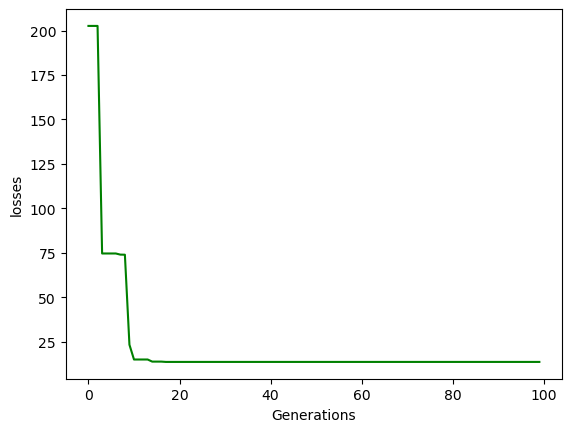

In [16]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):
    plt.plot(losses_list, c='green')
    plt.xlabel("Generations")
    plt.ylabel("losses")
    plt.show()


losses_list = run_ga()
visualize_loss(losses_list)

[-1.4692891827648635, -0.417056750212609, 1.3187943173054641, 0.16124298167449513]


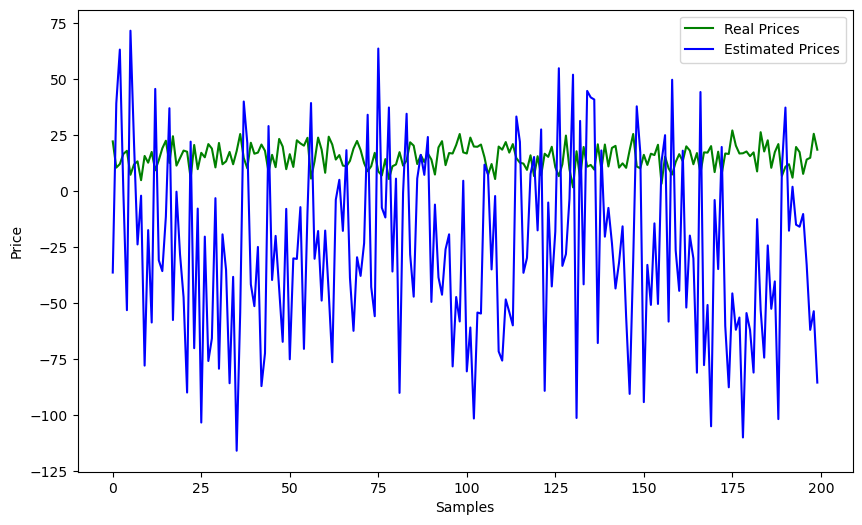

In [17]:
def visualize_predict_gt():
  # visualization of ground truth and predict value
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])

  estimated_prices = []
  for feature in features_x:
     estimated_prices.append(feature.dot(theta))

  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

visualize_predict_gt()